## Step 1: importing all the necessary libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns


## Step 2: Loading the Dataset

In [3]:
#  note => class: target variable (0 for normal transactions, 1 for fraudulent transactions)

data = pd.read_csv("creditcard.csv")
print(data.head(8))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.

In [4]:
# it will describe the datasets overall stats
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## Step 3: analyze class distribution

In [5]:


fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFraction = len(fraud)/ float(len(valid))
print("outlier fraction: " ,outlierFraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

## after seeing outlier fraction result we can say =>dataset is highly imbalanced 
# (with nearly  0.02% fraudulent transactions

outlier fraction:  0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


## Step 4: visualize transaction amounts

In [6]:
"""
Let’s compare the transaction amounts for fraudulent and normal
transactions. 
This will help us understand if there are any significant differences in the
monetary value of fraudulent transactions.

"""

print("Amount details of the fradulent transcations")
fraud.Amount.describe()


Amount details of the fradulent transcations


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("Amount details for normal/ valid transactions ")
valid.Amount.describe()

Amount details for normal/ valid transactions 


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
# From the output, we observe that fraudulent transactions tend to have higher average amounts, 
# which is common in fraud detection.

## Step 5: Correlation Matrix

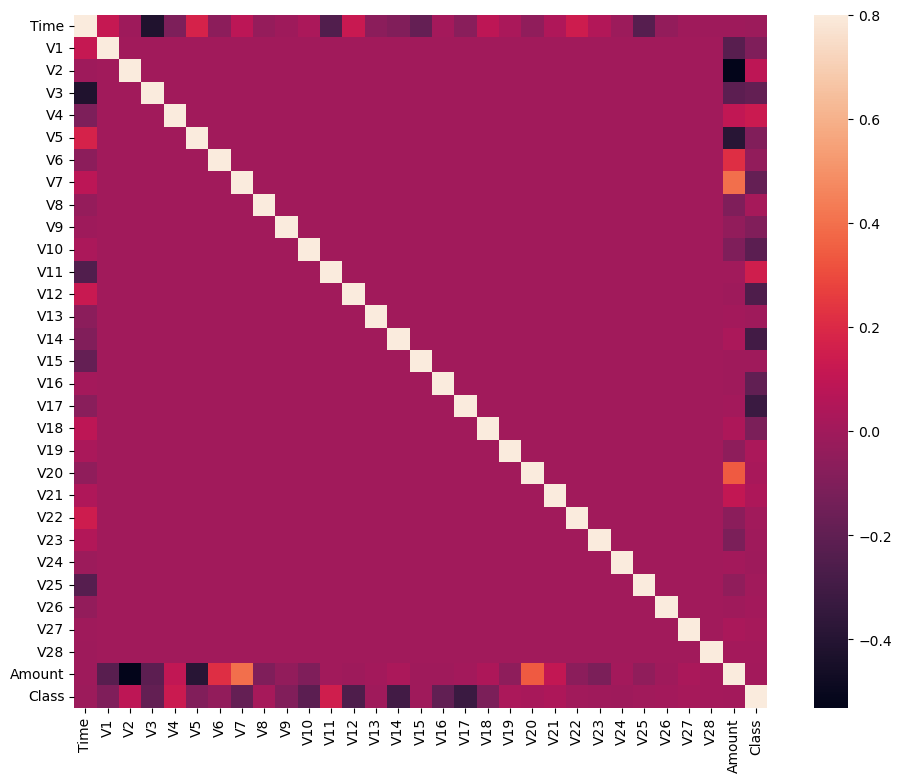

In [9]:
'''
We can visualize the correlation between features using a heatmap.

This will give us an understanding of how the different features are correlated
and which ones may be more relevant for prediction.
'''


corr_matrix = data.corr()
fig = plt.figure(figsize= (12,9))
sns.heatmap(corr_matrix , vmax = .8 , square = True)
plt.show()


## Step 6: Prepare the Data

In [10]:


X = data.drop(['Class'] , axis = 1)
Y = data['Class']

print(X.shape)
print(Y.shape)

"""
X is a pandas DataFrame (containing the features).

Y is a pandas Series (containing the target values, whether a transaction is fraud or valid).

When use .values, you're converting those pandas objects into numpy arrays, which is often done for
machine learning models.


This is because:
Scikit-learn and many machine learning algorithms expect the input data as numpy arrays
(or other similar formats), rather than pandas DataFrames or Series.

Numpy arrays are simpler and faster for numeric processing in machine learning.

"""


xData = X.values
yData = Y.values




(284807, 30)
(284807,)


In [11]:
from sklearn.model_selection import train_test_split

xTrain , xTest , yTrain , yTest = train_test_split(xData , yData , test_size = 0.2 , random_state = 42)

In [12]:
#  Handling if Missing Values are present

from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')  
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 0
NaN values in yTest after imputation: 0


## Step 7: Build and Train the Model

In [13]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain , yTrain)

# predictions
yPred  =rfc.predict(xTest)

## Step 8 : Evaluate the Model

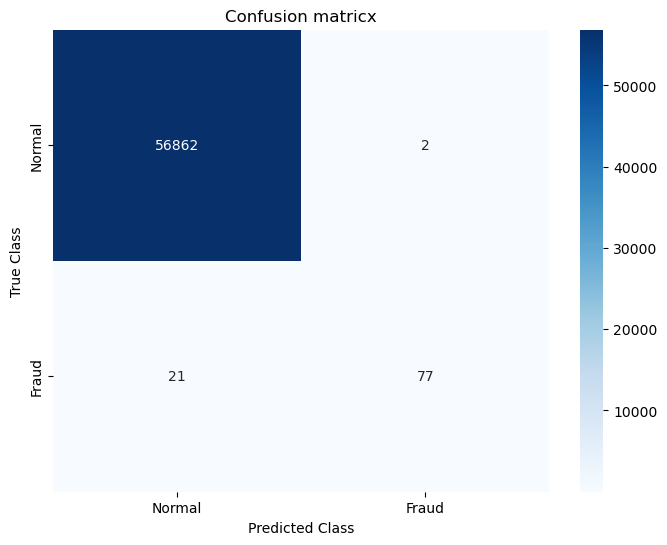

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(yTest,yPred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.title("Confusion matricx")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(yTest, yPred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



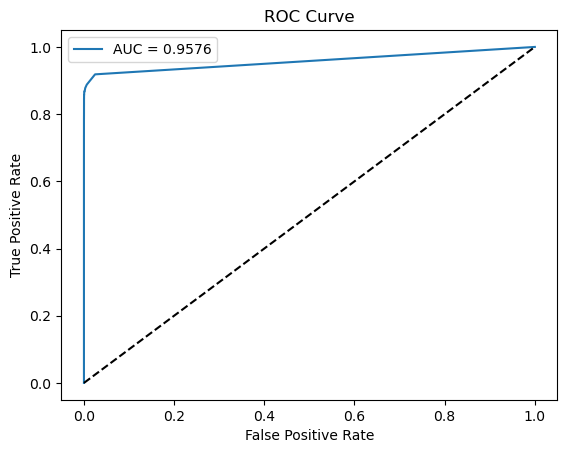

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = rfc.predict_proba(xTest)[:, 1]
fpr, tpr, _ = roc_curve(yTest, y_score)
auc = roc_auc_score(yTest, y_score)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [21]:
import pickle

# Save the model to a file
with open("fraud_model.pkl", "wb") as file:
    pickle.dump(rfc, file)
